# **Hearth Attack - Prediction Model**

In [1]:
import pandas as pd
import numpy as np

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import sklearn
print(sklearn.__version__)

1.2.2


In [3]:
data = pd.read_csv("heart_data.csv")

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

In [5]:
data.isna().sum()

State                            0
Sex                              0
GeneralHealth                 1198
PhysicalHealthDays           10927
MentalHealthDays              9067
LastCheckupTime               8308
PhysicalActivities            1093
SleepHours                    5453
RemovedTeeth                 11360
HadHeartAttack                3065
HadAngina                     4405
HadStroke                     1557
HadAsthma                     1773
HadSkinCancer                 3143
HadCOPD                       2219
HadDepressiveDisorder         2812
HadKidneyDisease              1926
HadArthritis                  2633
HadDiabetes                   1087
DeafOrHardOfHearing          20647
BlindOrVisionDifficulty      21564
DifficultyConcentrating      24240
DifficultyWalking            24012
DifficultyDressingBathing    23915
DifficultyErrands            25656
SmokerStatus                 35462
ECigaretteUsage              35660
ChestScan                    56046
RaceEthnicityCategor

In [6]:
#Drop all the rows with missing values
heart_data_cleaned = data.dropna()

In [7]:
heart_data_cleaned.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [9]:
# Create a dictionary to check the unique values in the categorical columns
unique_values = {col: heart_data_cleaned[col].unique().tolist() for col in heart_data_cleaned.columns}

In [10]:
# Print all the values included in the dictionary
import pprint
pprint.pprint(unique_values)

{'AgeCategory': ['Age 65 to 69',
                 'Age 70 to 74',
                 'Age 75 to 79',
                 'Age 80 or older',
                 'Age 50 to 54',
                 'Age 40 to 44',
                 'Age 60 to 64',
                 'Age 55 to 59',
                 'Age 45 to 49',
                 'Age 35 to 39',
                 'Age 25 to 29',
                 'Age 30 to 34',
                 'Age 18 to 24'],
 'AlcoholDrinkers': ['No', 'Yes'],
 'BMI': [27.99,
         30.13,
         31.66,
         31.32,
         33.07,
         34.96,
         33.3,
         24.37,
         26.94,
         22.6,
         36.62,
         46.87,
         32.74,
         35.15,
         27.26,
         28.28,
         25.54,
         20.14,
         25.06,
         27.2,
         27.34,
         33.89,
         27.12,
         31.89,
         32.08,
         21.03,
         28.34,
         33.96,
         26.52,
         38.74,
         26.61,
         29.95,
         21.93,
       

In [11]:
#Defining y
y = heart_data_cleaned['HadHeartAttack']

In [12]:
y = y.replace({'Yes': 1, 'No': 0})

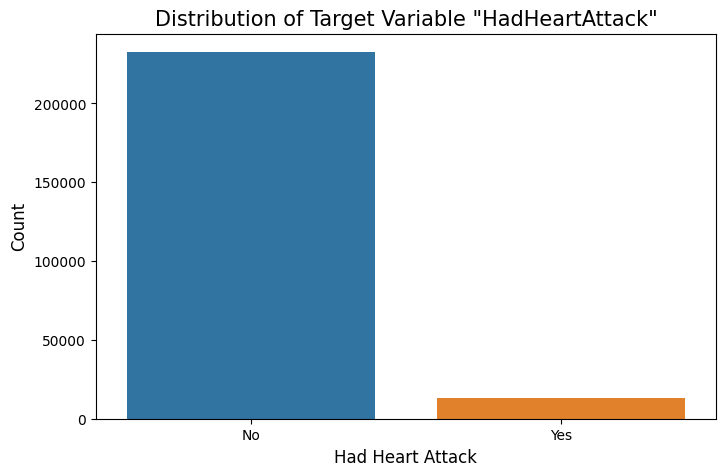

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bar plot for the target variable "HadHeartAttack" to check imbalance
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=heart_data_cleaned, x='HadHeartAttack')
ax.set_title('Distribution of Target Variable "HadHeartAttack"', fontsize=15)
ax.set_xlabel('Had Heart Attack', fontsize=12)
ax.set_ylabel('Count', fontsize=12)

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

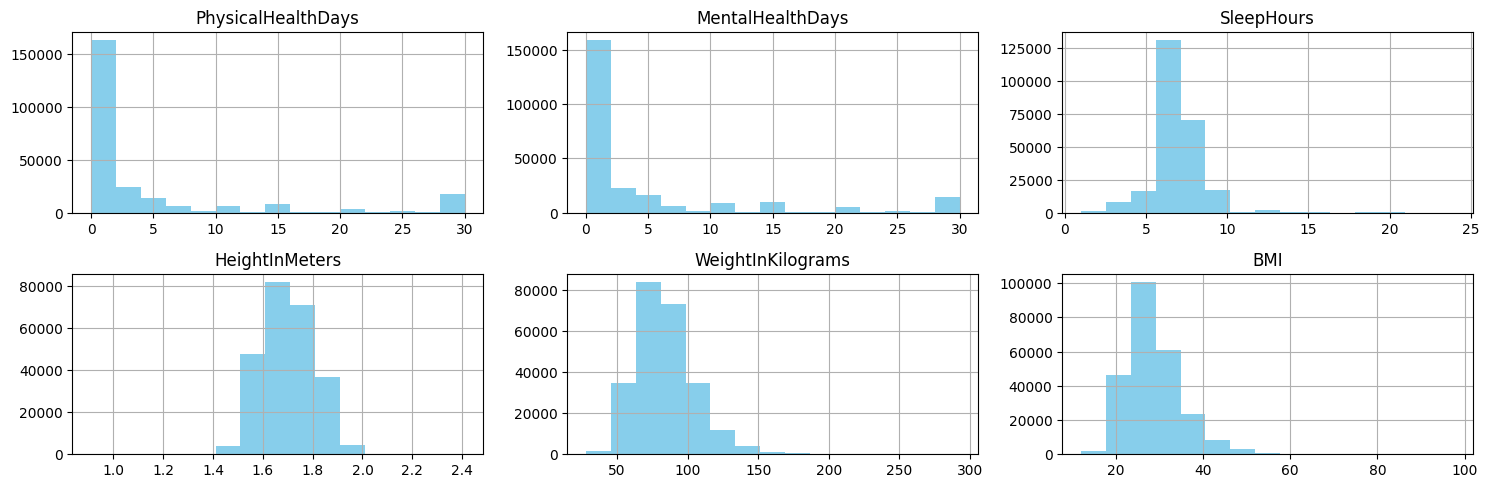

In [35]:
# Histograms for numerical features
numerical_features = heart_data_cleaned.select_dtypes(include=['float64', 'int64'])
numerical_features.hist(figsize=(15, 12), bins=15, layout=(5, 3), color='skyblue')
plt.tight_layout()
plt.show

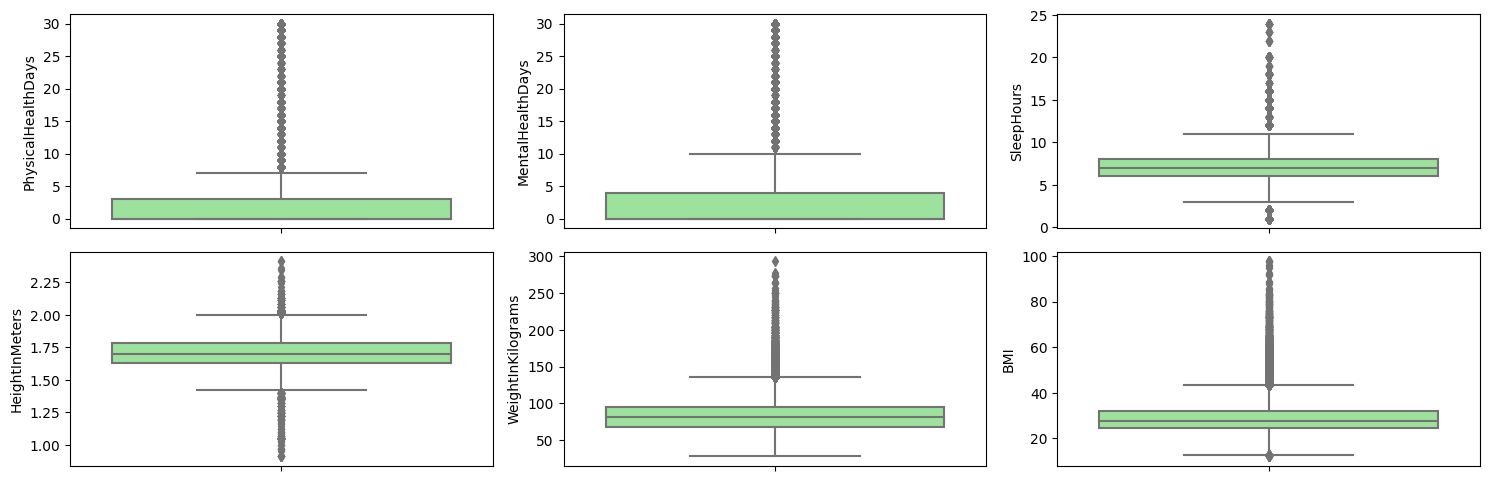

In [36]:
# Boxplots for numerical features
plt.figure(figsize=(15, 12))
for i, col in enumerate(numerical_features.columns):
    plt.subplot(5, 3, i+1)
    sns.boxplot(y=heart_data_cleaned[col], color='lightgreen')
    plt.tight_layout()
    plt.show

C:\Users\fhuer\AppData\Local\Temp\ipykernel_11928\344905047.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(heart_data_cleaned.corr(), annot=True, fmt=".2f", cmap='coolwarm')


<function matplotlib.pyplot.show(close=None, block=None)>

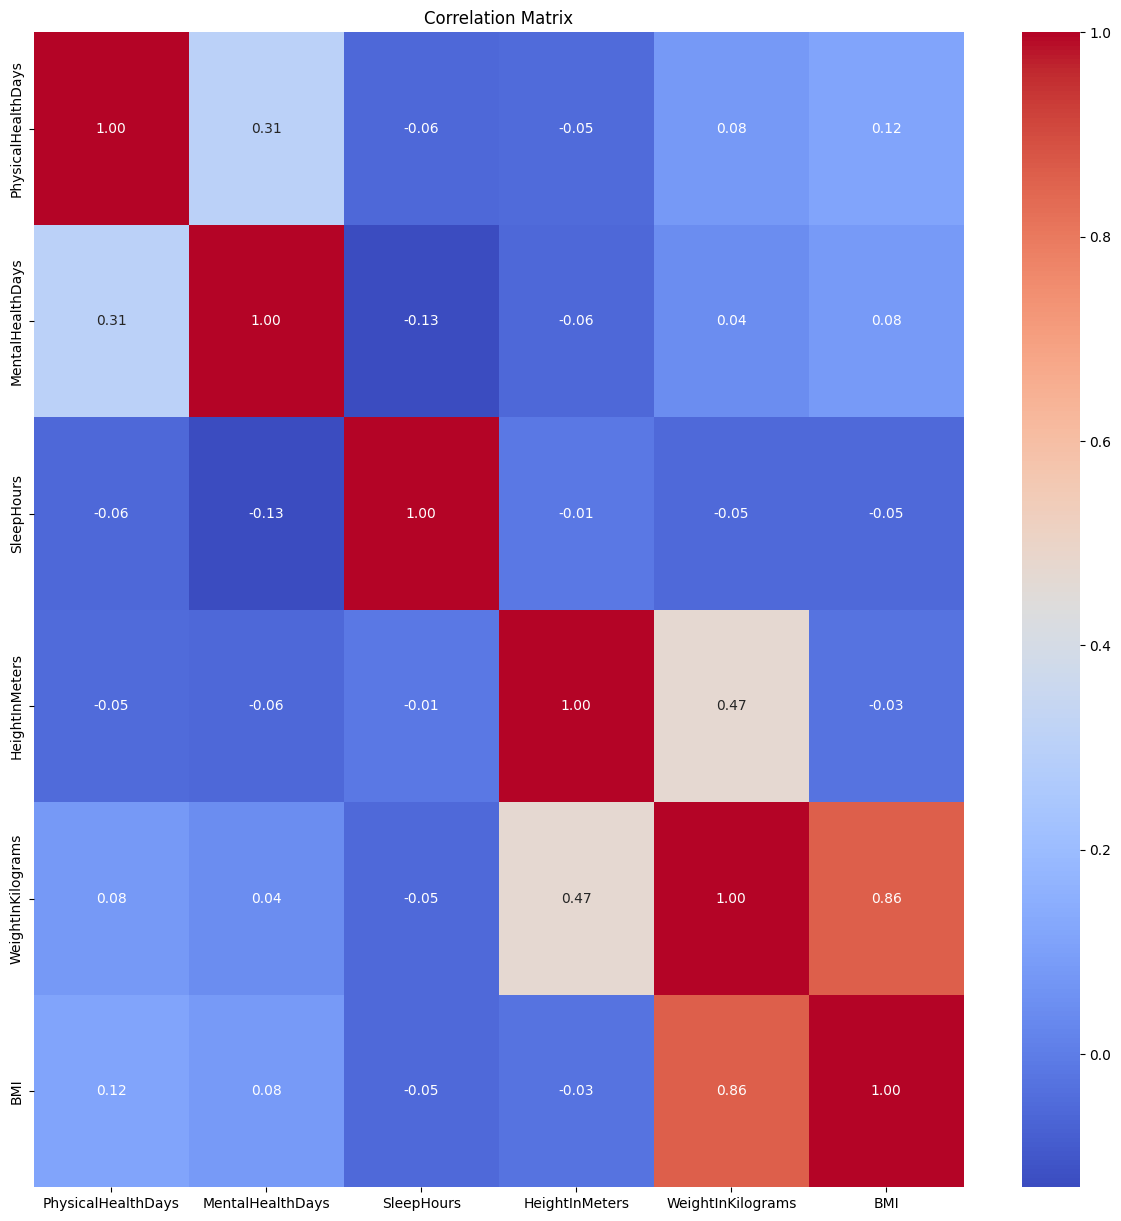

In [38]:
# Correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(heart_data_cleaned.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show

In [14]:
heart_data_cleaned = heart_data_cleaned.drop(['State', 'HadHeartAttack'], axis=1)

In [15]:
# Convert categorical variables to numeric using one-hot encoding
heart_data_encoded = pd.get_dummies(heart_data_cleaned, drop_first=True)

# Display the shape of the new dataframe
heart_data_encoded.shape

(246022, 68)

In [16]:
# Assuming df is your DataFrame
column_names = heart_data_encoded.columns.tolist()

# Now, column_names is a list of all column names in the DataFrame
for i in column_names:
    print(i)

PhysicalHealthDays
MentalHealthDays
SleepHours
HeightInMeters
WeightInKilograms
BMI
Sex_Male
GeneralHealth_Fair
GeneralHealth_Good
GeneralHealth_Poor
GeneralHealth_Very good
LastCheckupTime_Within past 2 years (1 year but less than 2 years ago)
LastCheckupTime_Within past 5 years (2 years but less than 5 years ago)
LastCheckupTime_Within past year (anytime less than 12 months ago)
PhysicalActivities_Yes
RemovedTeeth_6 or more, but not all
RemovedTeeth_All
RemovedTeeth_None of them
HadAngina_Yes
HadStroke_Yes
HadAsthma_Yes
HadSkinCancer_Yes
HadCOPD_Yes
HadDepressiveDisorder_Yes
HadKidneyDisease_Yes
HadArthritis_Yes
HadDiabetes_No, pre-diabetes or borderline diabetes
HadDiabetes_Yes
HadDiabetes_Yes, but only during pregnancy (female)
DeafOrHardOfHearing_Yes
BlindOrVisionDifficulty_Yes
DifficultyConcentrating_Yes
DifficultyWalking_Yes
DifficultyDressingBathing_Yes
DifficultyErrands_Yes
SmokerStatus_Current smoker - now smokes some days
SmokerStatus_Former smoker
SmokerStatus_Never smoked


In [17]:
heart_data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246022 entries, 342 to 445130
Data columns (total 68 columns):
 #   Column                                                                   Non-Null Count   Dtype  
---  ------                                                                   --------------   -----  
 0   PhysicalHealthDays                                                       246022 non-null  float64
 1   MentalHealthDays                                                         246022 non-null  float64
 2   SleepHours                                                               246022 non-null  float64
 3   HeightInMeters                                                           246022 non-null  float64
 4   WeightInKilograms                                                        246022 non-null  float64
 5   BMI                                                                      246022 non-null  float64
 6   Sex_Male                                                  

In [18]:
# Defining X
X = heart_data_encoded

In [19]:
Full_data = pd.concat([y, X], axis = 1)

In [20]:
Full_data.head()

,HadHeartAttack,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI,Sex_Male,GeneralHealth_Fair,GeneralHealth_Good,...,AlcoholDrinkers_Yes,HIVTesting_Yes,FluVaxLast12_Yes,PneumoVaxEver_Yes,"TetanusLast10Tdap_Yes, received Tdap","TetanusLast10Tdap_Yes, received tetanus shot but not sure what type","TetanusLast10Tdap_Yes, received tetanus shot, but not Tdap",HighRiskLastYear_Yes,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes
342,0,4.0,0.0,9.0,1.60,71.67,27.99,0,0,0,...,0,0,1,1,1,0,0,0,0,0
343,0,0.0,0.0,6.0,1.78,95.25,30.13,1,0,0,...,0,0,1,1,0,1,0,0,0,0
345,0,0.0,0.0,8.0,1.85,108.86,31.66,1,0,0,...,1,0,0,1,0,0,0,0,0,1
346,0,5.0,0.0,9.0,1.70,90.72,31.32,0,1,0,...,0,0,1,1,0,0,0,0,0,1
347,0,3.0,15.0,5.0,1.55,79.38,33.07,0,0,1,...,0,0,1,1,0,0,0,0,0,0


In [21]:
#This part is to delete all the variables that are not highly correlated with the target variable. 

# Calculate the correlation matrix
correlation_matrix = Full_data.corr()

# Extract the correlation of all features with the target variable
correlation_with_target = correlation_matrix['HadHeartAttack'].abs()

# Set a threshold for the correlation coefficient
correlation_threshold = 0.09

# Find the features that have a correlation above the threshold
features_to_keep = correlation_with_target[correlation_with_target > correlation_threshold].index.tolist()

# If the target variable is in the list, remove it
features_to_keep = [feature for feature in features_to_keep if feature != 'HadHeartAttack']

# Create a new dataframe with only the features to keep
data_filtered = Full_data[features_to_keep + ['HadHeartAttack']]

In [22]:
data_filtered.head()

,PhysicalHealthDays,GeneralHealth_Fair,GeneralHealth_Poor,"RemovedTeeth_6 or more, but not all",RemovedTeeth_All,RemovedTeeth_None of them,HadAngina_Yes,HadStroke_Yes,HadCOPD_Yes,HadKidneyDisease_Yes,HadArthritis_Yes,HadDiabetes_Yes,DeafOrHardOfHearing_Yes,DifficultyWalking_Yes,SmokerStatus_Never smoked,ChestScan_Yes,AgeCategory_Age 80 or older,PneumoVaxEver_Yes,HadHeartAttack
342,4.0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
343,0.0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0
345,0.0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0
346,5.0,1,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,1,0
347,3.0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0


In [23]:
filtered = correlation_with_target[correlation_with_target>correlation_threshold]
filtered

HadHeartAttack                         1.000000
PhysicalHealthDays                     0.133420
GeneralHealth_Fair                     0.112319
GeneralHealth_Poor                     0.140607
RemovedTeeth_6 or more, but not all    0.092477
RemovedTeeth_All                       0.120564
RemovedTeeth_None of them              0.122556
HadAngina_Yes                          0.445903
HadStroke_Yes                          0.177137
HadCOPD_Yes                            0.133223
HadKidneyDisease_Yes                   0.109355
HadArthritis_Yes                       0.117773
HadDiabetes_Yes                        0.145868
DeafOrHardOfHearing_Yes                0.097662
DifficultyWalking_Yes                  0.159878
SmokerStatus_Never smoked              0.094843
ChestScan_Yes                          0.167760
AgeCategory_Age 80 or older            0.100296
PneumoVaxEver_Yes                      0.119955
Name: HadHeartAttack, dtype: float64

In [24]:
X = data_filtered.drop('HadHeartAttack', axis=1)
y = data_filtered['HadHeartAttack']

In [25]:
X = X.rename(columns={'AgeCategory_Age 80 or older': 'AgeCategory_Age_80_or_older', 'RemovedTeeth_6 or more, but not all': 'RemovedTeeth_6_or_more_but_not_all'})

In [26]:
X.columns

Index(['PhysicalHealthDays', 'GeneralHealth_Fair', 'GeneralHealth_Poor',
       'RemovedTeeth_6_or_more_but_not_all', 'RemovedTeeth_All',
       'RemovedTeeth_None of them', 'HadAngina_Yes', 'HadStroke_Yes',
       'HadCOPD_Yes', 'HadKidneyDisease_Yes', 'HadArthritis_Yes',
       'HadDiabetes_Yes', 'DeafOrHardOfHearing_Yes', 'DifficultyWalking_Yes',
       'SmokerStatus_Never smoked', 'ChestScan_Yes',
       'AgeCategory_Age_80_or_older', 'PneumoVaxEver_Yes'],
      dtype='object')

In [27]:
# Spliting the data between train and test sets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

In [28]:
#With this code we will balance the data using SMOTE methodology
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the new class distribution
print(y_train_smote.value_counts(normalize=True) * 100)

0    50.0
1    50.0
Name: HadHeartAttack, dtype: float64


In [29]:
# Best Model for Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_simplified_model = RandomForestClassifier(
    n_estimators=150,       # Number of trees in the forest
    max_depth= 8,           # Maximum depth of the trees
    min_samples_split=8,   # Minimum number of samples required to split a node
    min_samples_leaf=5,    # Minimum number of samples required for a leaf node
    max_features='log2',   # Number of features to consider for the best split
    random_state=42,
    n_jobs=-1,
    class_weight= None,
    criterion = 'entropy',
    bootstrap = True
    
)

#Train model
rf_simplified_model.fit(X_train_smote, y_train_smote)

# Predict probabilities on the test set
y_prob_rf_simplified = rf_simplified_model.predict_proba(X_test)[:, 1]

from sklearn.metrics import roc_auc_score

# Assume y_test is your true labels and y_prob_rf_simplified is the predicted probabilities for the positive class
roc_auc_rf_simplified = roc_auc_score(y_test, y_prob_rf_simplified)
print(f"ROC AUC Score: {roc_auc_rf_simplified}")


ROC AUC Score: 0.8679912793924786


In [33]:
# Save the ML model as a pickle file
import pickle

# Save the model to a file
with open('model.pkl', 'wb') as model_pkl:
    pickle.dump(rf_simplified_model, model_pkl, protocol=4)

print("Model has been saved to 'model.pkl'")

Model has been saved to 'model.pkl'
